In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# read data 
train_data= pd.read_csv("/kaggle/input/TSABTAE/train1.csv")#, delimiter ='\t')
test_data= pd.read_csv("/kaggle/input/TSABTAE/test1.csv",)# delimiter ='\t')

In [2]:
train_data.head()

,date,flag,user,text,id,target
0,Wed Jun 03 03:47:24 PDT 2009,NO_QUERY,mayhemstudios,"@JennaMadison awww, thanks . I like you too, a...",1325379,1
1,Mon Jun 01 05:54:18 PDT 2009,NO_QUERY,ruralmama,&quot;The man&quot; is gone for a week. Pouting!,275675,0
2,Wed Jun 17 17:34:38 PDT 2009,NO_QUERY,princesslaylah,stupid itunes keeps crashing so i can't update...,583702,0
3,Fri May 29 11:43:58 PDT 2009,NO_QUERY,candace_lea,is ready for the weekend!,1058019,1
4,Mon Jun 15 12:45:11 PDT 2009,NO_QUERY,joluvs2shop,@schofe must be great getting all the freebies...,1545430,1


In [3]:
test_data.head()

,date,flag,user,text,id
0,Sat May 30 18:30:14 PDT 2009,NO_QUERY,susanhutchinson,@smilingtime Love the profile pic. I have a p...,1136227
1,Sun Jun 21 06:43:36 PDT 2009,NO_QUERY,jodgozum,i'm doing a letter to the department.,738556
2,Tue Jun 02 04:49:35 PDT 2009,NO_QUERY,deegarcia104,"@jaycantu merry christmas, pappy. now you look...",1289784
3,Sat Jun 06 14:01:26 PDT 2009,NO_QUERY,voxdolo,Much love to all my rocketeers from @cadiebug ...,1419520
4,Sun May 31 09:21:09 PDT 2009,NO_QUERY,ilove_shoes,i still hate the two people i was on skype wit...,1178091


In [4]:
train_data.isnull().sum()

date      0
flag      0
user      0
text      0
id        0
target    0
dtype: int64

In [5]:
test_data.isnull().sum()

date    0
flag    0
user    0
text    0
id      0
dtype: int64

In [6]:
#import seaborn as sns
#sns.set_style('darkgrid')
#sns.lmplot('id','target',data=train_data, hue='target',palette='magma_r',size=6,aspect=1,fit_reg=False)

# step1: Clean TXT (Data) 

In [7]:
train_data.shape

(1023999, 6)

In [8]:
test_data.shape

(256000, 5)

In [9]:
# to show first row
train_data['text'][0]

'@JennaMadison awww, thanks . I like you too, always funny! '

In [10]:
df = train_data.drop([ 'date', 'flag', 'user'], axis=1)# id


val_count = df.target.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

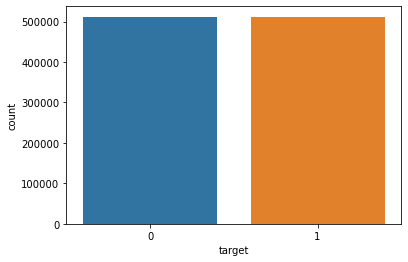

In [11]:
# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
#df = sns.load_dataset('tips')
 
# count plot on single categorical variable
sns.countplot(x ='target', data = train_data)
 
# Show the plot
plt.show()

We conluded from above char, we have balanced data

# pre-process data 
1. decide what we would to show space

In [12]:
import re
tweet =re.sub('[^a-z A-Z]',' ' ,train_data['text'][0])# Decided what we want to appears (letters without spaces)
# ' ' with space between sentences(words)

# change all letters to small

In [13]:
tweet=tweet.lower()

# split strings into list

In [14]:
tweet=tweet.split()

# Remove stop words

In [15]:
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords 
tweet=[word for word in tweet if not word in stopwords.words('english')]

# Return words to its root (stem)

In [16]:
from nltk.stem.porter import PorterStemmer  # we will added to last line 
ps=PorterStemmer()
tweet= [ps.stem(word) for word in tweet if not word in stopwords.words('english')]
# previous steps was done only on one line (First row)

# Apply on all train_data 

In [ ]:
Corpus=[]
for i in range (0, 1023999):# rang from row shapes
    tweet =re.sub('[^a-z A-Z]','' ,train_data['text'][i])# Decided what we want to appears (letters without spaces)
    tweet=tweet.lower()
    tweet=tweet.split()##Splitting the tweets into words
    #tweet=[word for word in tweet if not word in stopwords.words('english')]
    tweet= [ps.stem(word) for word in tweet if not word in stopwords.words('english')] #Stemming and removing the stopwords

    tweet=' '.join(tweet)
    Corpus.append(tweet)# we put wordsin list
Corpus

    

# Creat Bag of words 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer#.text
#To Do ( increase #of features)
cv=CountVectorizer(max_df=75, min_df=15,max_features=19000)
X=cv.fit_transform(np.array(Corpus).ravel())
#y=train_data.iloc[:,-1].values.ravel()
y = np.array(train_data["target"]).ravel() 
#print(X)

In [ ]:
print(X)

In [ ]:
X.shape

# Splitting dataset into the training  and testing sets¶


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=30)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

# GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

In [ ]:
#grid_GBC = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
 #   grid_GBC.fit(X_train, y_train)

    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

# K-mean clustering

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

#data = list(zip(X_train))#,y_train
inertias = []

for i in range(1,11):# just 2 cluster becouse we have 2 targets
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)#,y_train)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')#len(X_train)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train) 

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

#data = list(zip(X_train,  y_train))
#kmeans = KMeans(n_clusters=2)
kmeans = KMeans(n_clusters=2, random_state=0, )#n_init="auto")#.fit(X_train)
kmeans.fit(X_train)#  y_train)#data)
kmeans.labels_
#plt.scatter(X_train, y_train, c=kmeans.labels_)
#plt.show()

In [ ]:
identified_clusters = kmeans.fit_predict(X_test)
identified_clusters

def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
test_data['Cluster'] = test_data['target'].apply(converter)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(y_test,identified_clusters))
print(classification_report(y_test,identified_clusters))
#ConfusionMatrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,identified_clusters)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# MiniBatch

In [ ]:
from sklearn.cluster import MiniBatchKMeans
MiniBatchkmeans = MiniBatchKMeans(n_clusters=2,
                          random_state=0,
                          batch_size=,
                          ).fit(X_train)

In [ ]:
pred=MiniBatchkmeans.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
#ConfusionMatrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
model.fit(X_train)
# fit model and predict clusters
yhat = model.predict(X_test)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
# get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
# create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

print("ConfusionMatrix",confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))

# Mean Shift

Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

from sklearn.cluster import MeanShift
# define the model
model2 = MeanShift()
model2.fit(X_train)
# fit model and predict clusters
yhat2 = model2.predict(X_test)
# retrieve unique clusters
clusters = unique(yhat2)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat2 == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

print("ConfusionMatrix",confusion_matrix(y_test,yhat2))
print(classification_report(y_test,yhat2))

# preprocess test_data

In [ ]:
test_Corpus=[]
for i in range (0, 256000):# rang from row shapes
    test_tweet =re.sub('[^a-z A-Z]','' ,test_data['text'][i])# Decided what we want to appears (letters without spaces)
    test_tweet=test_tweet.lower()
    test_tweet=test_tweet.split()##Splitting the tweets into words
    #review=[word for word in review if not word in stopwords.words('english')]
    test_tweet= [ps.stem(word) for word in test_tweet if not word in stopwords.words('english')] #Stemming and removing the stopwords

    test_tweet=' '.join(test_tweet)
    test_Corpus.append(test_tweet)# we put wordsin list
test_Corpus

In [ ]:
# Bag of words 
from sklearn.feature_extraction.text import CountVectorizer#.text
cv=CountVectorizer(max_df=75, min_df=15,max_features=19000)
X_test2=cv.fit_transform(np.array(test_Corpus).ravel())
#y=train_data.iloc[:,-1].values


In [ ]:
print(X_test2)

In [ ]:
identified_clusters = kmeans.fit_predict(X_test2)
identified_clusters

In [ ]:
submission = pd.DataFrame(data = {'id': test_data.id, 'target': identified_clusters})
submission.to_csv('identified_clusters9.csv', index = False)
submission.head()

# pred & submission mini_batch

In [ ]:
pred=MiniBatchkmeans.predict(X_test2)

In [ ]:
submission = pd.DataFrame(data = {'id': test_data.id, 'target': pred})
submission.to_csv('submission_MiniBatch9.csv', index = False)
submission.head()

In [ ]:
import seaborn as sns
sns.countplot(submission['target'])

# Pred&sub (DBSCAN)

In [ ]:
pred2=model.predict(X_test2)
submission = pd.DataFrame(data = {'id': test_data.id, 'target': pred2})
submission.to_csv('submission_DBSCAN.csv', index = False)
submission.head()

Pred &Submit MeanShift

pred3=model2.predict(X_test2)
submission = pd.DataFrame(data = {'id': test_data.id, 'target': pred3})
submission.to_csv('submission_MeanShift.csv', index = False)
submission.head()

# training on NaiveBayes

from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the test set

y_pred= classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# plot CM

from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
classifier2= RandomForestClassifier(n_estimators=50)
classifier2.fit(X_train, y_train)

y_pred2= classifier2.predict(X_test)


cm2= confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)